In [1]:
## Caio César Barreto Couto e Matheus Vellez Bione Botelho - 4° Período B
## Disciplina: Estatística e Probabilidade

In [2]:
import pandas as pd #Importando as bibliotecas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import scipy
import scipy.stats

In [3]:
#from google.colab import drive #Importando o drive

In [4]:
#drive.mount('/content/gdrive')

In [5]:
pkmn = pd.read_csv('C:\Estatistica\\pokemons.csv')
#pkmn = pd.read_csv('/content/gdrive/My Drive/Estatistica/pokemons.csv')
pkmn.head(151)

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,A strange seed was planted on its back at birt...
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405,10,130,overgrow chlorophyll,"When the bulb on its back grows large, it appe..."
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525,20,1000,overgrow chlorophyll,The plant blooms when it is absorbing solar en...
3,4,charmander,ordinary,generation-i,nothing,fire,None,39,52,43,60,50,65,309,6,85,blaze solar-power,"Obviously prefers hot places. When it rains, s..."
4,5,charmeleon,ordinary,generation-i,charmander,fire,None,58,64,58,80,65,80,405,11,190,blaze solar-power,"When it swings its burning tail, it elevates t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,dratini,ordinary,generation-i,nothing,dragon,None,41,64,45,50,50,50,300,18,33,shed-skin marvel-scale,Long considered a mythical POKéMON until recen...
147,148,dragonair,ordinary,generation-i,dratini,dragon,None,61,84,65,70,70,70,420,40,165,shed-skin marvel-scale,A mystical POKéMON that exudes a gentle aura. ...
148,149,dragonite,ordinary,generation-i,dragonair,dragon,flying,91,134,95,100,100,80,600,22,2100,inner-focus multiscale,An extremely rarely seen marine POKéMON. Its i...
149,150,mewtwo,legendary,generation-i,nothing,psychic,None,106,110,90,154,90,130,680,20,1220,pressure unnerve,It was created by a scientist after years of h...


In [6]:
pkmn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1017 non-null   int64 
 1   name          1017 non-null   object
 2   rank          1017 non-null   object
 3   generation    1017 non-null   object
 4   evolves_from  1017 non-null   object
 5   type1         1017 non-null   object
 6   type2         1017 non-null   object
 7   hp            1017 non-null   int64 
 8   atk           1017 non-null   int64 
 9   def           1017 non-null   int64 
 10  spatk         1017 non-null   int64 
 11  spdef         1017 non-null   int64 
 12  speed         1017 non-null   int64 
 13  total         1017 non-null   int64 
 14  height        1017 non-null   int64 
 15  weight        1017 non-null   int64 
 16  abilities     1017 non-null   object
 17  desc          1017 non-null   object
dtypes: int64(10), object(8)
memory usage: 143.1+ KB


In [7]:
pkmn.describe()

,id,hp,atk,def,spatk,spdef,speed,total,height,weight
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,509.000000,69.965585,77.425762,72.215339,69.855457,70.054081,67.060964,426.577188,12.053097,659.910521
std,293.726914,26.598461,29.828754,29.131082,29.557427,26.662701,28.724702,112.432492,12.435152,1198.306370
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,1.000000,1.000000
25%,255.000000,50.000000,55.000000,50.000000,46.000000,50.000000,45.000000,323.000000,5.000000,85.000000
50%,509.000000,67.000000,75.000000,70.000000,65.000000,66.000000,65.000000,450.000000,10.000000,280.000000
75%,763.000000,84.000000,100.000000,90.000000,90.000000,85.000000,88.000000,505.000000,15.000000,682.000000
max,1017.000000,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,720.000000,200.000000,9999.000000


In [8]:
pkmn[['hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'height', 'weight']].corr()

,hp,atk,def,spatk,spdef,speed,height,weight
hp,1.000000,0.476778,0.293509,0.354587,0.366276,0.177896,0.479604,0.473299
atk,0.476778,1.000000,0.466070,0.283469,0.224800,0.348753,0.384934,0.403840
def,0.293509,0.466070,1.000000,0.203330,0.503644,0.002864,0.349164,0.449731
spatk,0.354587,0.283469,0.203330,1.000000,0.493796,0.425344,0.314528,0.180704
spdef,0.366276,0.224800,0.503644,0.493796,1.000000,0.210450,0.275156,0.261802
speed,0.177896,0.348753,0.002864,0.425344,0.210450,1.000000,0.200632,0.037303
height,0.479604,0.384934,0.349164,0.314528,0.275156,0.200632,1.000000,0.627397
weight,0.473299,0.403840,0.449731,0.180704,0.261802,0.037303,0.627397,1.000000


In [9]:
atk = pkmn['atk']
defesa = pkmn['def']
spatk = pkmn['spatk']
spdef = pkmn['spdef']
spd = pkmn['speed']
hei = pkmn['height']
wei = pkmn['weight']
sec_sts = [hei, wei]
norm_sts = [atk, defesa]
spec_sts = [spatk, spdef]
off_stats = [atk,defesa,spatk,spdef]
battle_stats = [atk,defesa,spatk,spdef,spd]
all_stats = [atk,defesa,spatk,spdef,spd,hei,wei]

# Estatística descritiva

## Box Plot

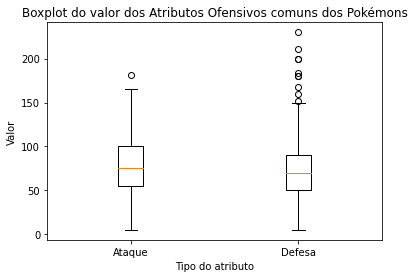

In [10]:
fig, ax = plt.subplots()
ax.boxplot(norm_sts)
ax.set_title('Boxplot do valor dos Atributos Ofensivos comuns dos Pokémons')
ax.set_xlabel('Tipo do atributo')
ax.set_ylabel('Valor')
xticks = ['Ataque', 'Defesa']
ax.set_xticklabels(xticks)
plt.show()

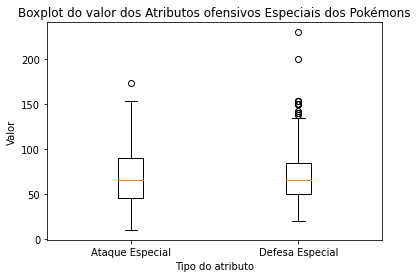

In [11]:
fig, ax = plt.subplots()
ax.boxplot(spec_sts)
ax.set_title('Boxplot do valor dos Atributos ofensivos Especiais dos Pokémons')
ax.set_xlabel('Tipo do atributo')
ax.set_ylabel('Valor')
xticks = ['Ataque Especial', 'Defesa Especial']
ax.set_xticklabels(xticks)
plt.show()

## Histograma

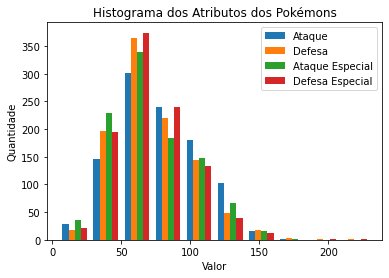

In [12]:
fig, ax = plt.subplots()
ax.hist(off_stats, label=['Ataque', 'Defesa', 'Ataque Especial', 'Defesa Especial'])
ax.set_title('Histograma dos Atributos dos Pokémons')
ax.set_xlabel('Valor')
ax.set_ylabel('Quantidade')
ax.legend(loc='upper right')
plt.show()

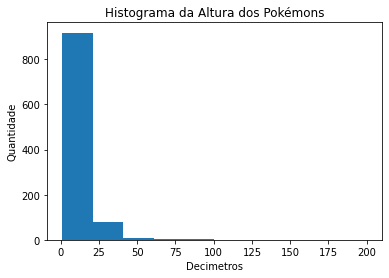

In [13]:
fig, ax = plt.subplots()
ax.hist(hei)
ax.set_title('Histograma da Altura dos Pokémons')
ax.set_xlabel('Decimetros')
ax.set_ylabel('Quantidade')
plt.show()


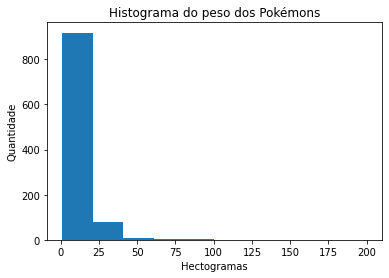

In [14]:
fig, ax = plt.subplots()
ax.hist(hei)
ax.set_title('Histograma do peso dos Pokémons')
ax.set_xlabel('Hectogramas')
ax.set_ylabel('Quantidade')
plt.show()

## Scatter Plot

In [15]:
fig = px.scatter(pkmn, x='spatk', y='speed', size='weight', color='type1', hover_name='name')
fig.show()


In [16]:
fig = px.scatter(pkmn, x='spdef', y='def', color='type1', hover_name='name')
fig.show()

In [17]:
fig = px.scatter(pkmn, x='spatk', y='atk', color='type1', hover_name='name')
fig.show()

In [18]:
fig = px.scatter(pkmn, x='speed', y='weight', color='type1', hover_name='name')
fig.show()

In [19]:
fig = px.scatter(pkmn, x='speed', y='def', color='type1', hover_name='name')
fig.show()

In [20]:
fig = px.scatter(pkmn, x='height', y='weight', color='type1', hover_name='name')
fig.show()

In [21]:
pkmn[['spdef', 'def']].corr()

,spdef,def
spdef,1.000000,0.503644
def,0.503644,1.000000


## Heatmap

<AxesSubplot:>

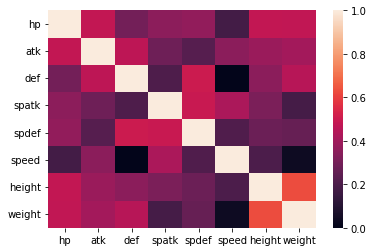

In [22]:
sns.heatmap(pkmn[['hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'height', 'weight']].corr(), yticklabels=True, vmin=0, vmax=1)

<AxesSubplot:>

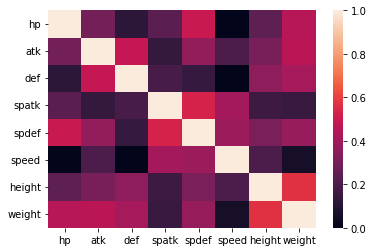

In [23]:
sns.heatmap((pkmn[pkmn.generation == 'generation-i'])[['hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'height', 'weight']].corr(), yticklabels=True, vmin=0, vmax=1)

<AxesSubplot:>

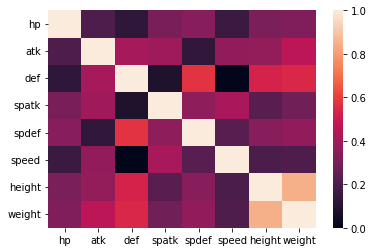

In [24]:
sns.heatmap((pkmn[pkmn.generation == 'generation-ii'])[['hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'height', 'weight']].corr(), yticklabels=True, vmin=0, vmax=1)

<AxesSubplot:>

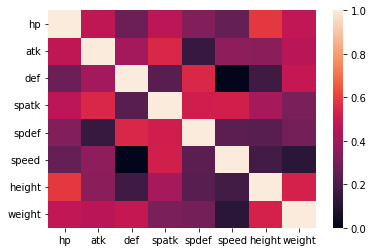

In [25]:
sns.heatmap((pkmn[pkmn.generation == 'generation-iii'])[['hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'height', 'weight']].corr(), yticklabels=True, vmin=0, vmax=1)

<AxesSubplot:>

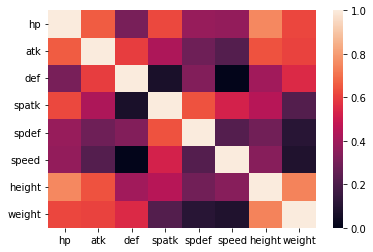

In [26]:
sns.heatmap((pkmn[pkmn.generation == 'generation-vi'])[['hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'height', 'weight']].corr(), yticklabels=True, vmin=0, vmax=1)

<AxesSubplot:>

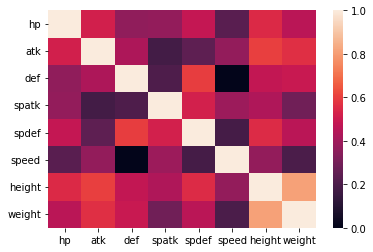

In [27]:
sns.heatmap((pkmn[pkmn.generation == 'generation-v'])[['hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'height', 'weight']].corr(), yticklabels=True, vmin=0, vmax=1)

<AxesSubplot:>

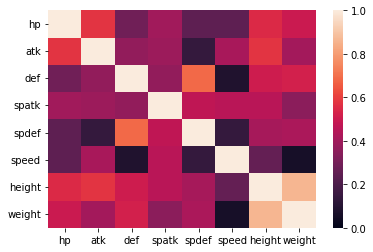

In [28]:
sns.heatmap((pkmn[pkmn.generation == 'generation-iv'])[['hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'height', 'weight']].corr(), yticklabels=True, vmin=0, vmax=1)

# Normal Padrão

In [29]:
scaler = StandardScaler()
ajuste = scaler.fit(off_stats)
normal = scaler.transform(off_stats)

normalpadrao = pd.DataFrame(normal)
normalpadraorows = normalpadrao.transpose()
normalpadraorows.head(10)

,0,1,2,3
0,-1.000000,-1.000000,1.000000,1.000000
1,-1.056281,-0.942088,0.999185,0.999185
2,-1.056281,-0.942088,0.999185,0.999185
3,0.123823,-1.362056,1.444605,-0.206372
4,-0.339306,-1.079609,1.634837,-0.215922
5,-0.421825,-0.928014,1.687298,-0.337460
6,-1.123203,1.059020,-0.866471,0.930654
7,-1.120631,0.996116,-0.871602,0.996116
8,-1.085355,0.714746,-0.873579,1.244188
9,0.577350,1.347151,-0.962250,-0.962250


In [30]:
corr_stats = [pkmn['height'], pkmn['speed'], pkmn['spatk']]
normal2 = scaler.fit(corr_stats)
normal2 = scaler.transform(corr_stats)
normalpadrao2 = pd.DataFrame(normal2)
normalpadraorows2 = normalpadrao2.transpose()
normalpadraorows2.head(10)


,0,1,2
0,-1.330258,0.249423,1.080834
1,-1.358732,0.339683,1.019049
2,-1.372813,0.392232,0.980581
3,-1.410079,0.798629,0.611450
4,-1.414214,0.707107,0.707107
5,-1.408636,0.595652,0.812984
6,-1.399362,0.522653,0.876709
7,-1.404516,0.559079,0.845437
8,-1.408195,0.591227,0.816968
9,-1.140110,1.294701,-0.154591


In [31]:
normal3 = scaler.fit(all_stats)
normal3 = scaler.transform(all_stats)
normalpadrao3 = pd.DataFrame(normal3)
normalpadraorows3 = normalpadrao3.transpose()
normalpadraorows3.head(10)

,0,1,2,3,4,5,6
0,-0.043750,-0.043750,0.772920,0.772920,-0.247918,-2.187509,0.977088
1,-0.220976,-0.190646,0.324965,0.324965,-0.281636,-1.798138,1.841467
2,-0.393131,-0.390042,-0.337537,-0.337537,-0.399308,-0.584622,2.442176
3,0.019107,-0.382142,0.375773,-0.070059,0.598690,-2.031723,1.490355
4,-0.283253,-0.402219,0.033990,-0.263425,0.033990,-1.334122,2.215040
5,-0.388638,-0.409300,-0.302547,-0.385194,-0.333540,-0.619361,2.438579
6,-0.171878,0.533414,-0.088902,0.491926,-0.379316,-1.955850,1.570607
7,-0.322869,-0.048430,-0.290582,-0.048430,-0.403586,-1.178471,2.292368
8,-0.387335,-0.325132,-0.380017,-0.306836,-0.405630,-0.632491,2.437441
9,0.323835,0.728628,-0.485752,-0.485752,1.538215,-1.862050,0.242876


# Distribuições Amostrais

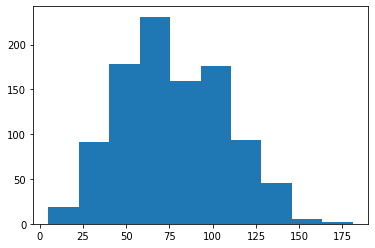

In [32]:
means=[np.mean(np.random.choice(pkmn['atk'], size=1)) for _ in range(1000)]
plt.hist(means)
plt.show()

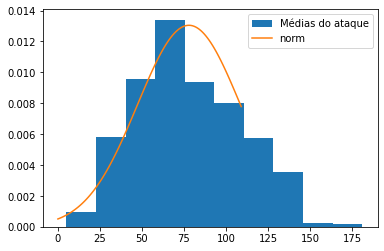

In [33]:
means=[np.mean(np.random.choice(pkmn['atk'], size=1)) for _ in range(1000)]
size = 110
x = np.arange(size)
plt.hist(means, density=True, label='Médias do ataque')
dist_names = ['norm']
for dist_name in dist_names:  #o comando for _ in cria um laço
    dist = getattr(scipy.stats, dist_name) #a função getattr retorna o valor de um atributo de um objeto
    params = dist.fit(means)
    arg = params[:-2] #cria uma nova lista mostrando os primeiros elementos excluindo os 2 últimos elementos
    loc = params[-2] #localiza o penúltimo elemento
    scale = params[-1] #localiza o último elemento
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale) #*arg permite que a função aceite números variáveis de argumentos posicionais; loc = loc é a mesma coisa de loc = loc + loc
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale)
    plt.plot(pdf_fitted, label=dist_name)
plt.legend(loc= 'upper right')
plt.show()

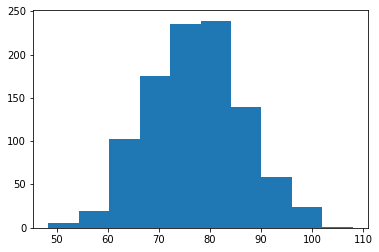

In [34]:
means=[np.mean(np.random.choice(pkmn['atk'], size=10)) for _ in range(1000)]
plt.hist(means)
plt.show()

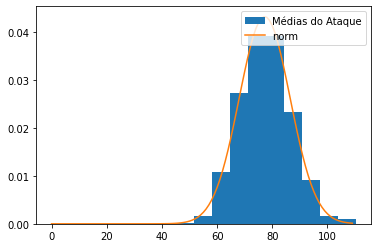

In [35]:
means=[np.mean(np.random.choice(pkmn['atk'], size=10)) for _ in range(1000)]
size = 110
x = np.arange(size)
plt.hist(means, density=True, label='Médias do Ataque')
dist_names = ['norm']
for dist_name in dist_names:  #o comando for _ in cria um laço
  dist = getattr(scipy.stats, dist_name) #a função getattr retorna o valor de um atributo de um objeto
  params = dist.fit(means)
  arg = params[:-2] #cria uma nova lista mostrando os primeiros elementos excluindo os 2 últimos elementos
  loc = params[-2] #localiza o penúltimo elemento
  scale = params[-1] #localiza o último elemento
  if arg:
    pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale) #*arg permite que a função aceite números variáveis de argumentos posicionais; loc = loc é a mesma coisa de loc = loc + loc
  else:
    pdf_fitted = dist.pdf(x, loc=loc, scale=scale)
  plt.plot(pdf_fitted, label=dist_name)

plt.legend(loc= 'upper right')
plt.show()

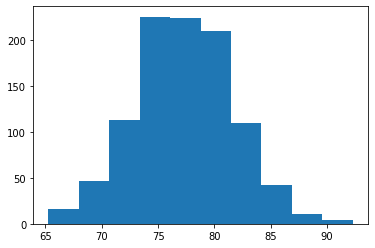

In [36]:
means=[np.mean(np.random.choice(pkmn['atk'], size=50)) for _ in range(1000)]
plt.hist(means)
plt.show()

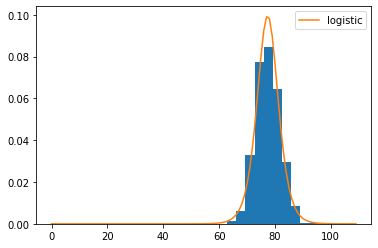

In [37]:
means=[np.mean(np.random.choice(pkmn['atk'], size=50)) for _ in range(1000)]
plt.hist(means, density=True)
dist_names = ['logistic']
for dist_name in dist_names:  #o comando for _ in cria um laço
    dist = getattr(scipy.stats, dist_name) #a função getattr retorna o valor de um atributo de um objeto
    params = dist.fit(means)
    arg = params[:-2] #cria uma nova lista mostrando os primeiros elementos excluindo os 2 últimos elementos
    loc = params[-2] #localiza o penúltimo elemento
    scale = params[-1] #localiza o último elemento
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale) #*arg permite que a função aceite números variáveis de argumentos posicionais; loc = loc é a mesma coisa de loc = loc + loc
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale)
    plt.plot(pdf_fitted, label=dist_name)
plt.legend(loc= 'upper right')
plt.show()

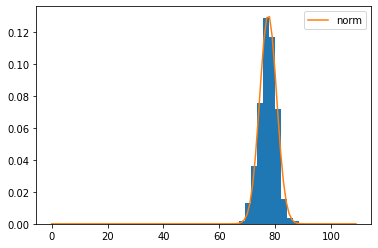

In [38]:
means=[np.mean(np.random.choice(pkmn['atk'], size=100)) for _ in range(1000)]
plt.hist(means, density=True)
dist_names = ['norm']
for dist_name in dist_names:  #o comando for _ in cria um laço
    dist = getattr(scipy.stats, dist_name) #a função getattr retorna o valor de um atributo de um objeto
    params = dist.fit(means)
    arg = params[:-2] #cria uma nova lista mostrando os primeiros elementos excluindo os 2 últimos elementos
    loc = params[-2] #localiza o penúltimo elemento
    scale = params[-1] #localiza o último elemento
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale) #*arg permite que a função aceite números variáveis de argumentos posicionais; loc = loc é a mesma coisa de loc = loc + loc
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale)
    plt.plot(pdf_fitted, label=dist_name)
plt.legend(loc= 'upper right')
plt.show()

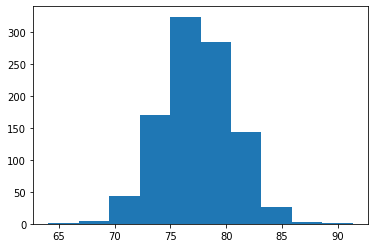

In [39]:
means=[np.mean(np.random.choice(pkmn['atk'], size=100)) for _ in range(1000)]
plt.hist(means)
plt.show()

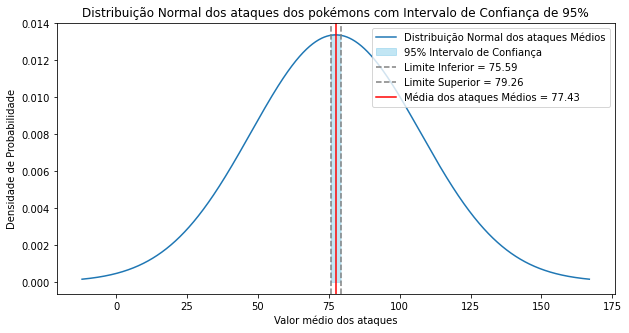

In [43]:
from scipy.stats import norm

amostra = pkmn['atk']

media = amostra.mean()
desvio_padrao = amostra.std()
num = len(amostra)

erro_padrao = desvio_padrao / np.sqrt(num)

z_valor = norm.ppf(0.975)
margem_erro = erro_padrao * z_valor

limite_inferior = media - margem_erro
limite_superior = media + margem_erro

x_vals = np.linspace(media - 3*desvio_padrao, media + 3*desvio_padrao, 1000)
y_vals = norm.pdf(x_vals, media, desvio_padrao)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label='Distribuição Normal dos ataques Médios')

plt.fill_between(x_vals, y_vals, where=(x_vals >= limite_inferior) & (x_vals <= limite_superior), color='skyblue', alpha=0.5, label='95% Intervalo de Confiança')

plt.axvline(x=limite_inferior, color='grey', linestyle='--', label=f'Limite Inferior = {limite_inferior:.2f}')
plt.axvline(x=limite_superior, color='grey', linestyle='--', label=f'Limite Superior = {limite_superior:.2f}')

plt.axvline(x=media, color='red', linestyle='-', label=f'Média dos ataques Médios = {media:.2f}')

plt.title('Distribuição Normal dos ataques dos pokémons com Intervalo de Confiança de 95%')
plt.xlabel('Valor médio dos ataques')
plt.ylabel('Densidade de Probabilidade')
plt.legend(loc='upper right')

plt.show()